# Welcome is the SimSDP Jupiter notebook
In this notebook, we will read and analyze several CSV files located in the `Simulation/` folder.

   STD workload  STD link load  Final latency  Unnamed: 3
0      0.314962            1.0    158931665.0         1.0
1      0.150636            1.0    117555996.0         1.0


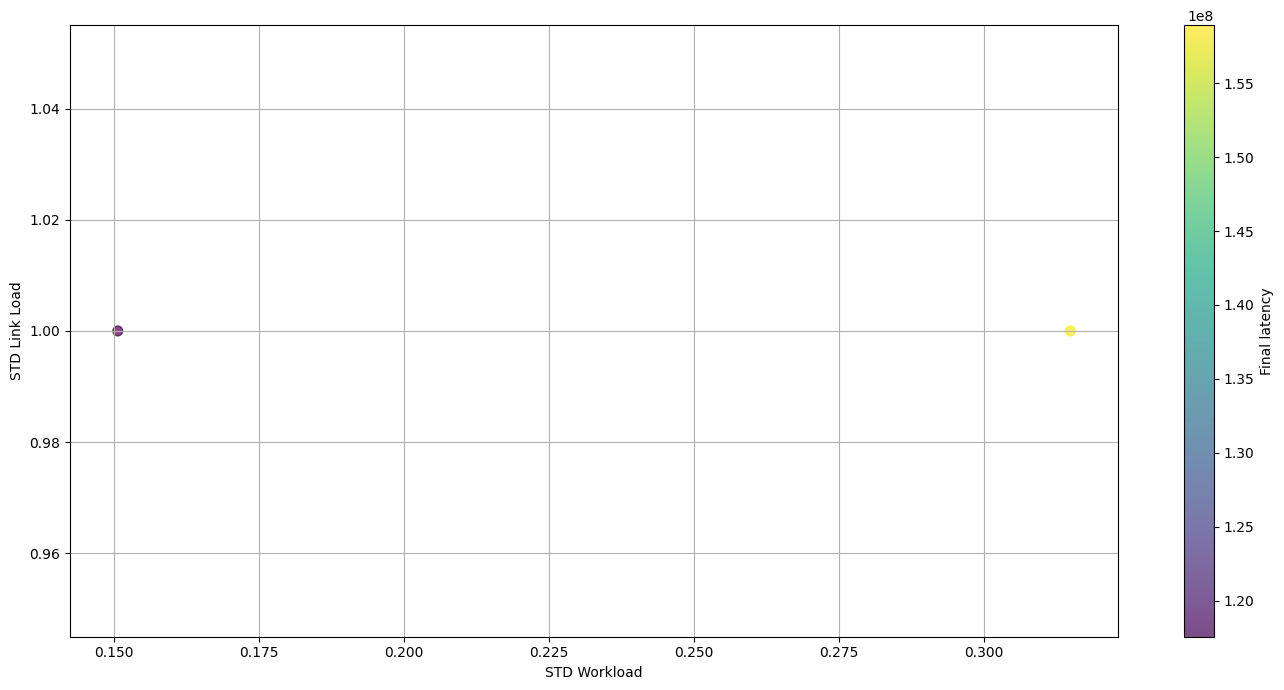

In [53]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/correlation.csv'

# Lire le fichier CSV
df_correlation = pd.read_csv(chemin_fichier, sep=';')

# Remplacer les valeurs NaN par 1
df_correlation.fillna(1, inplace=True)

# Afficher les premières lignes du dataframe
print(df_correlation.head())

# Tracer le nuage de points avec latence comme couleur
plt.figure(figsize=(14, 7))

# Utiliser un graphique de type scatter avec latence comme couleur
scatter = plt.scatter(
    df_correlation['STD workload'],
    df_correlation['STD link load'],
    c=df_correlation['Final latency'],
    cmap='viridis',  # Choisissez une palette de couleurs pour la latence
    s=50,  # Taille des points
    alpha=0.7  # Transparence des points
)

# Ajouter une barre de couleur pour la latence
cbar = plt.colorbar(scatter)
cbar.set_label('Final latency')

#plt.title('Workload vs Link Load avec Latence comme Couleur')
plt.xlabel('STD Workload')
plt.ylabel('STD Link Load')
plt.grid(True)
plt.tight_layout()
plt.show()


# We aim to minimize the final latency, represented by violet dots. 
# The plot should reveal that minimized final latency is obtained with a small workload deviation.
# This means that a balanced workload distribution should offer ideal final latency.

                            Step  Duration(ms)
0               initialisation:0             0
1          node partitioning:1:1          7913
2  thread partitioning node0:1:1          5132
3  thread partitioning node1:1:1         12882
4  thread partitioning node2:1:1          5813


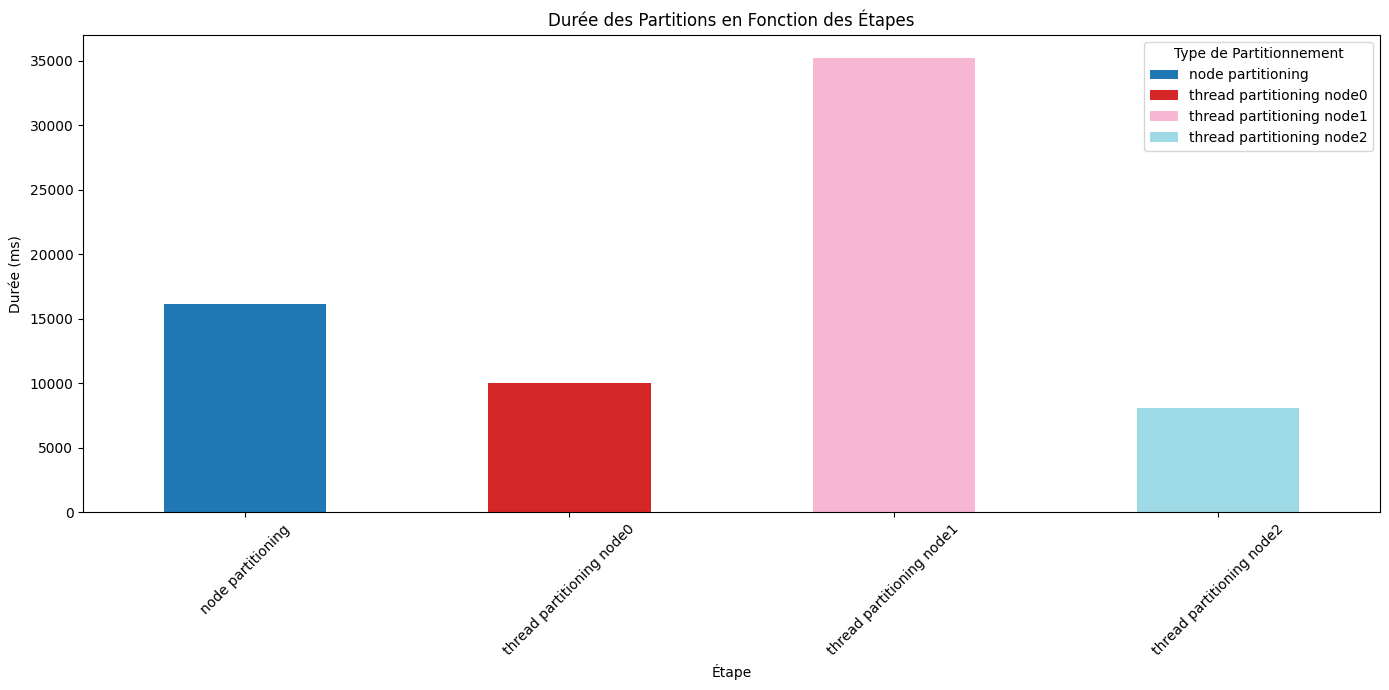

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/dse_part_trend.csv'

# Lire le fichier CSV
df_dse = pd.read_csv(chemin_fichier, sep=';')

# Afficher les premières lignes du dataframe
print(df_dse.head())

# Initialiser des listes pour stocker les données
steps = []
durations = []
labels = []

# Traiter les lignes pour extraire les informations pertinentes
for _, row in df_dse.iterrows():
    # Obtenir la ligne en tant que chaîne
    line = row.iloc[0]
    if 'node partitioning' in line or 'thread partitioning' in line:
        # Extraction des données en utilisant des expressions régulières
        match = re.search(r'(node partitioning|thread partitioning \w+):(\d+:\d+)', line)
        if match:
            label = match.group(1)
            duration = int(row.iloc[1])
            steps.append(label)
            #steps.append(line.split(':')[0])
            durations.append(duration)
            labels.append(label)

# Créer un DataFrame pour une manipulation facile
df_dse_part_trend = pd.DataFrame({
    'Step': steps,
    'Duration(ms)': durations,
    'Label': labels
})

# Afficher les premières lignes du DataFrame pour vérification
#print(df_dse_part_trend.head())

# Préparer les données pour le graphique
pivot_df = df_dse_part_trend.pivot_table(index='Step', columns='Label', values='Duration(ms)', aggfunc='sum', fill_value=0)

# Tracer le diagramme en barres empilées
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Durée des Partitions en Fonction des Étapes')
plt.xlabel('Étape')
plt.ylabel('Durée (ms)')
plt.legend(title='Type de Partitionnement')
plt.xticks(rotation=45)  # Rotation des labels des étapes pour une meilleure lisibilité
plt.tight_layout()
plt.show()

             0
0  158931665.0
1  117555996.0


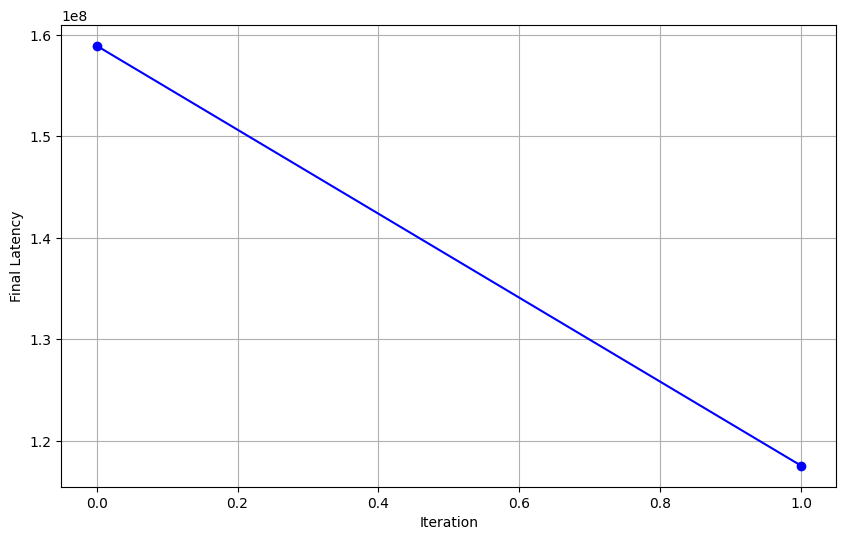

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/latency_trend.csv'

# Lire le fichier CSV
df_latency_trend = pd.read_csv(chemin_fichier, header=None)

# Afficher les premières lignes du dataframe
print(df_latency_trend.head())

# Assumer que le DataFrame a une colonne représentant les valeurs de latence
iterations = df_latency_trend.index
latency = df_latency_trend[0]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(iterations, latency, marker='o', linestyle='-', color='b')
#plt.title('Latence en Fonction des Itérations')
plt.xlabel('Iteration')
plt.ylabel('Final Latency')
plt.grid(True)
plt.show()

# We analyze the impact of the SimSDP iteration and see if the process effectively adjusts the workload distribution and obtains good final latency.
# For fine-grained description the trend should appear asymptotic reduced benefiting from iteration partitioning.
# For coarse-grained description the trend directly finds minimized latency and then oscillates around this minimum through iteration.

           0           1          2
0  691273728  2000420864  979107840
1  667680768  2715549696  157286400


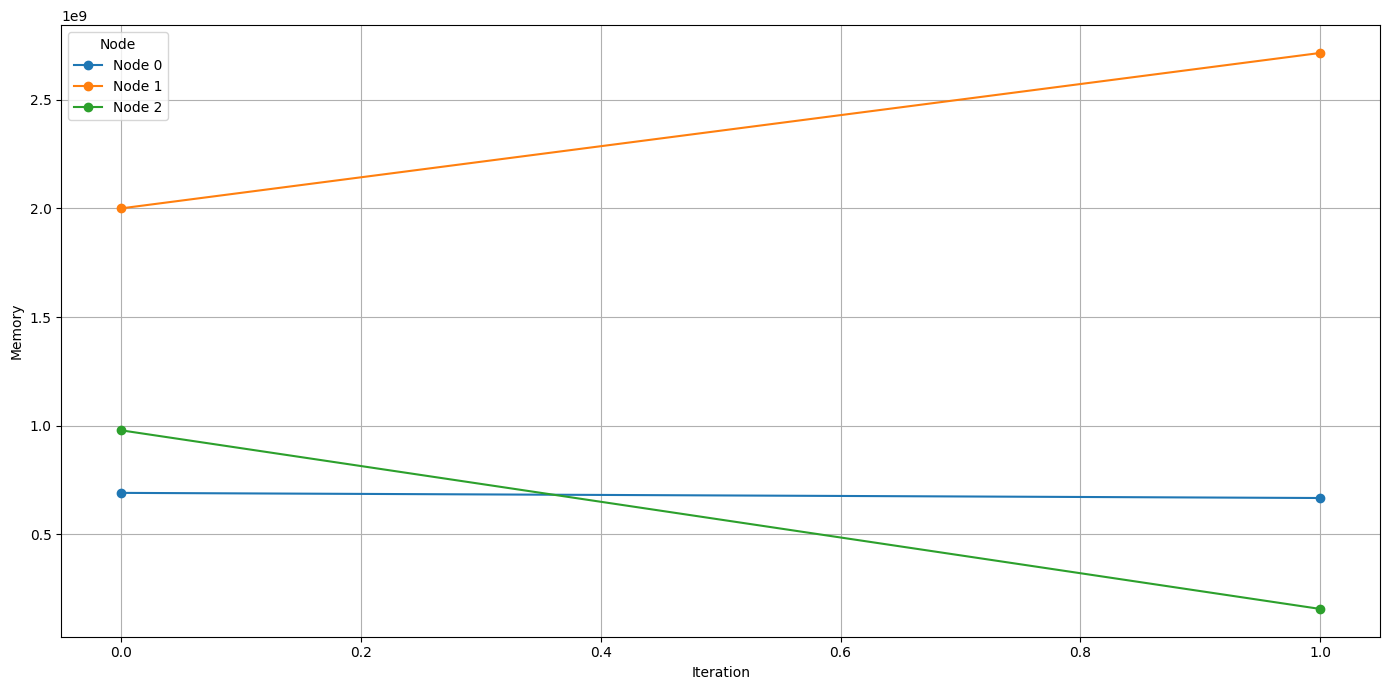

In [48]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/memory_trend.csv'

# Lire le fichier CSV
df_memory_trend = pd.read_csv(chemin_fichier, header=None, sep=';')

# Afficher les premières lignes du dataframe
print(df_memory_trend.head())

# Nombre total de colonnes (chaque colonne représente un nœud)
n_nodes = df_memory_trend.shape[1]

# Préparer les données pour le graphique
plt.figure(figsize=(14, 7))

# Tracer les courbes d'occupation pour chaque nœud
for i in range(n_nodes):
    plt.plot(df_memory_trend.index, df_memory_trend[i], label=f'Node {i}', marker='o')

#plt.title('Occupation par Nœud en Fonction des Itérations')
plt.xlabel('Iteration')
plt.ylabel('Memory')
plt.legend(title='Node')
plt.grid(True)
plt.tight_layout()
plt.show()


                                         0
0  type,Cluster with shared backbone:3:3:3
1                   finalLatency,158931665
2                        memory,5060165632
3                                 energy,1
4                                   cost,1
type,Cluster with shared backbone:3:3:3
finalLatency,158931665
memory,5060165632
energy,1
cost,1
,
type,Cluster with crossbar:3:3:3
finalLatency,117555996
memory,4572053504
energy,1
cost,1


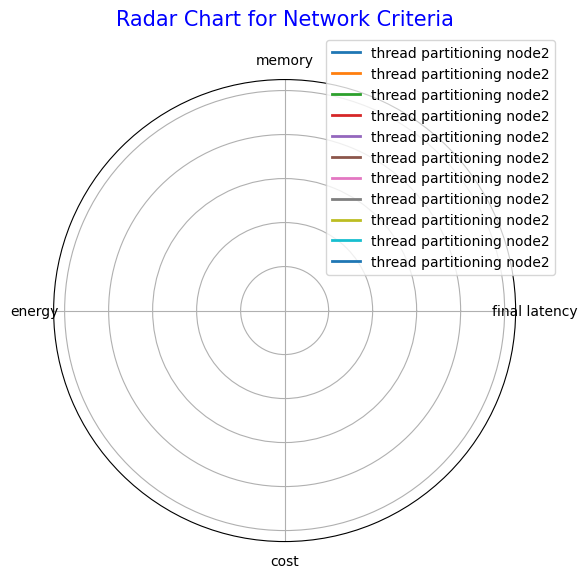

In [88]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/multicriteria.csv'

# Lire le fichier CSV
df = pd.read_csv(chemin_fichier, header=None, sep=';')

# Afficher les premières lignes du dataframe
print(df.head())

# Initialiser les listes pour stocker les données
labels = []
final_latencies = []
memories = []
energies = []
costs = []

# Traiter le contenu du fichier
for i, row in df.iterrows():
    # Supposons que chaque ligne du DataFrame contient une section
    line = row[0]
    print(line)

    entries = line.strip().split('\n')  # Séparation des lignes

    # Initialiser les valeurs avec NaN
    final_latency = memory = energy = cost = None
    for line in entries[1:]:
            # Extraction des clés et valeurs
            if ';' in line:
                key, value = line.split(';')
                try:
                    entry[key] = float(value)
                except ValueError:
                    entry[key] = value 
                # Stocker les valeurs selon la clé
                if key == 'final latency':
                    final_latency = value
                elif key == 'memory':
                    memory = value
                elif key == 'energy':
                    energy = value
                elif key == 'cost':
                    cost = value
    # Ajouter les valeurs extraites aux listes
    labels.append(label)
    final_latencies.append(final_latency)
    memories.append(memory)
    energies.append(energy)
    costs.append(cost)

data = {
    'label': labels,
    'final latency': final_latencies,
    'memory': memories,
    'energy': energies,
    'cost': costs
}

# Assumons que les colonnes sont 'final latency', 'memory', 'energy', 'cost'
criteria = ['final latency', 'memory', 'energy', 'cost']

# Exemple de données pour un réseau
data2 = {
    'label': ['Cluster with crossbar'],
    'final latency': [10],  # Remplacez avec les valeurs extraites de vos données
    'memory': [20],
    'energy': [15],
    'cost': [25]
}

# Convertir les données en DataFrame pour une manipulation facile
df_radar = pd.DataFrame(data)

# Fonction pour créer le radar chart
def create_radar_chart(data, labels):
    num_vars = len(labels)
    
    # Calculer les angles pour les axes
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Compléter le cycle
    angles += angles[:1]
    
    # Créer la figure et les axes
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Tracer chaque donnée
    for i, row in data.iterrows():
        values = row[labels].tolist()
        values += values[:1]
        ax.plot(angles, values, linestyle='solid', linewidth=2, label=row['label'])
        ax.fill(angles, values, alpha=0.25)
    
    # Ajouter des labels aux axes
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Ajouter une légende
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    # Afficher le graphique
    plt.title('Radar Chart for Network Criteria', size=15, color='blue', y=1.1)
    plt.show()

# Créer le radar chart
create_radar_chart(df_radar, criteria)

          0         1         2
0  0.498557  0.999994  0.705481
1  0.464373  0.600436  0.354966


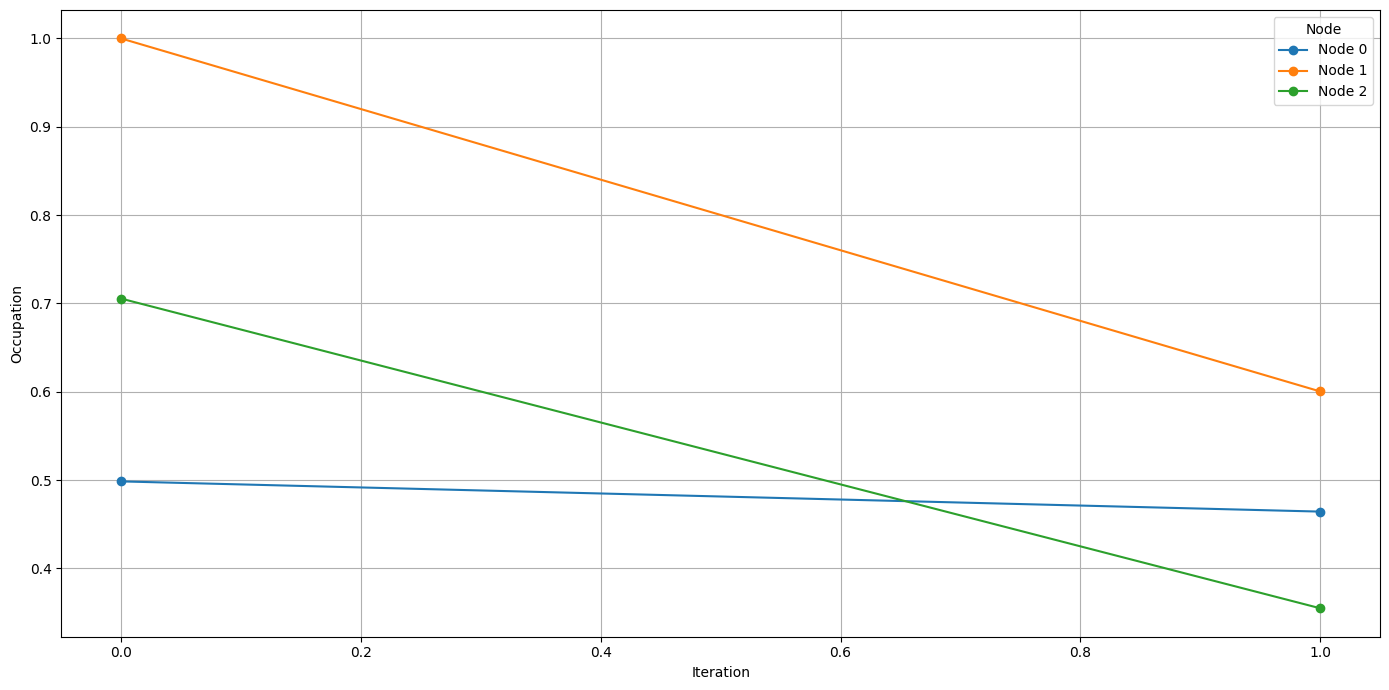

In [46]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/occupation_trend.csv'

# Lire le fichier CSV
df_occupation_trend = pd.read_csv(chemin_fichier, header=None, sep=';')

# Afficher les premières lignes du dataframe
print(df_occupation_trend.head())

# Nombre total de colonnes (chaque colonne représente un nœud)
n_nodes = df_occupation_trend.shape[1]

# Préparer les données pour le graphique
plt.figure(figsize=(14, 7))

# Tracer les courbes d'occupation pour chaque nœud
for i in range(n_nodes):
    plt.plot(df_occupation_trend.index, df_occupation_trend[i], label=f'Node {i}', marker='o')

#plt.title('Occupation par Nœud en Fonction des Itérations')
plt.xlabel('Iteration')
plt.ylabel('Occupation')
plt.legend(title='Node')
plt.grid(True)
plt.tight_layout()
plt.show()


          0    1         2    3         4         5
0  1.495672  3.0  2.999977  3.0  1.088213  2.114615
1  1.393120  3.0  1.801287  3.0  1.064898  1.064898


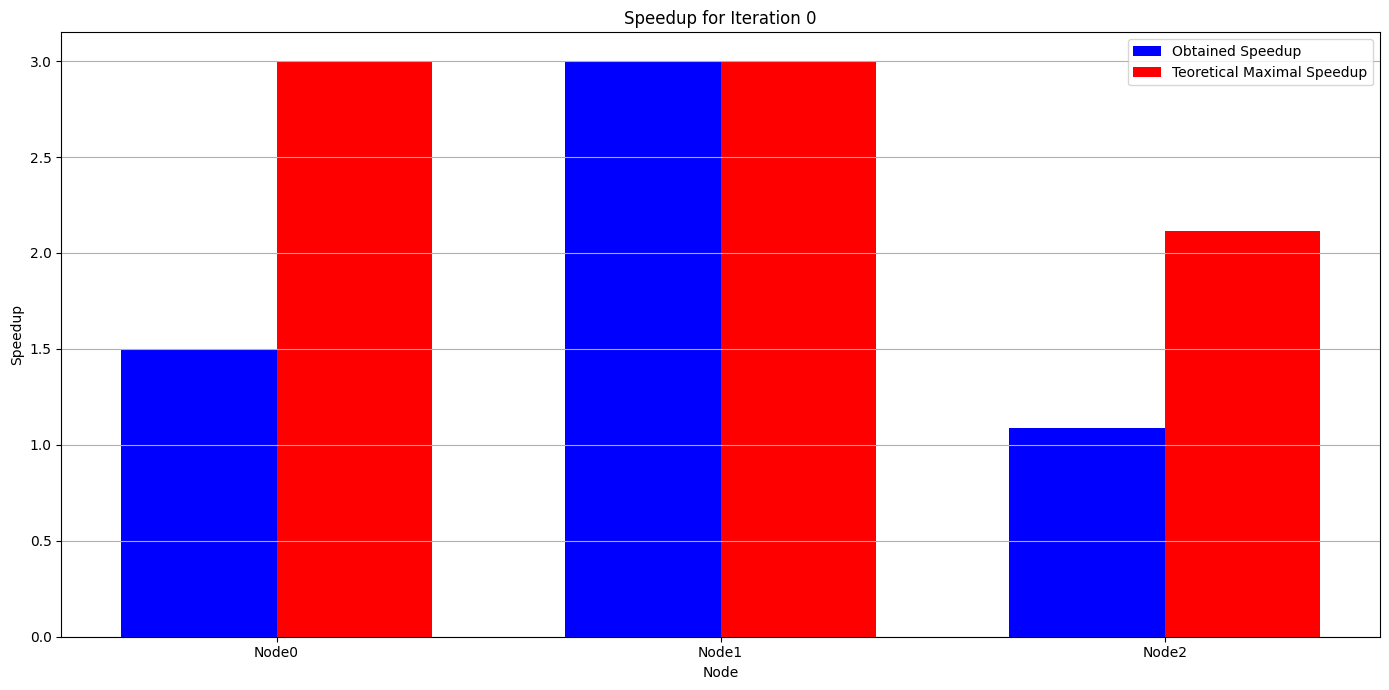

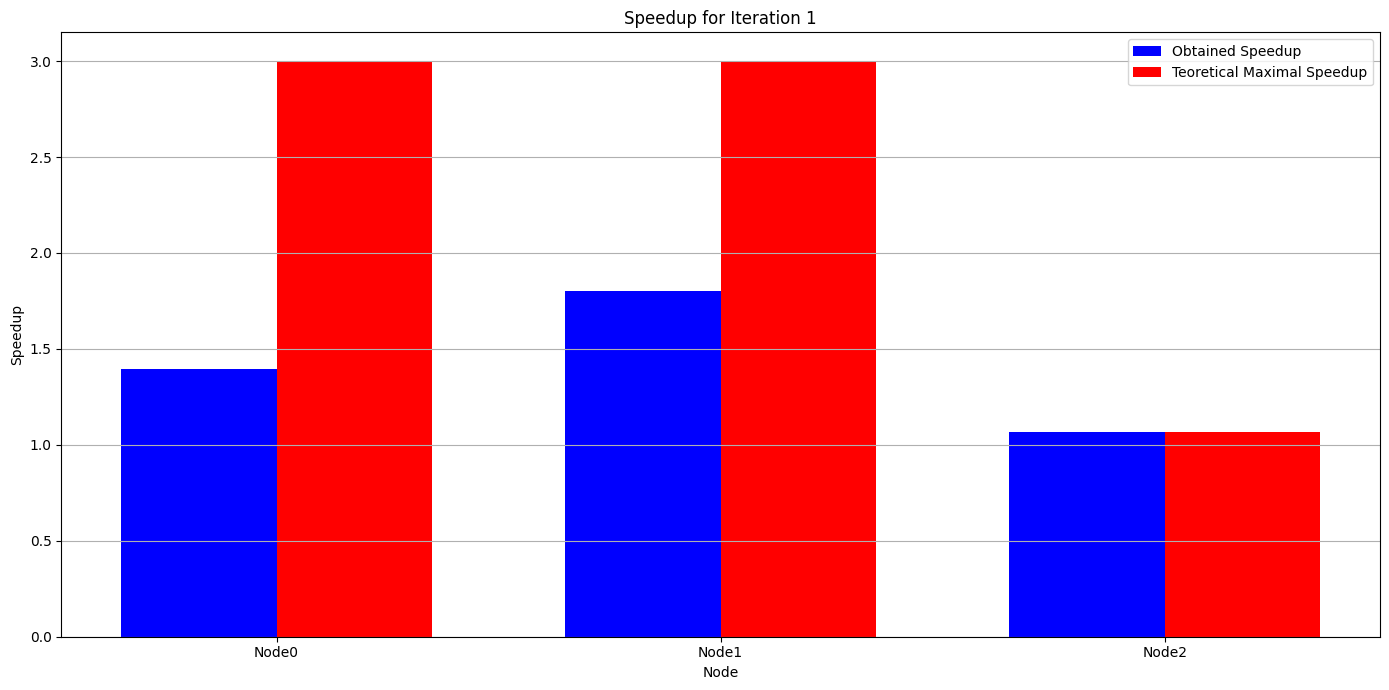

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/speedup_trend.csv'

# Lire le fichier CSV
df_speedup = pd.read_csv(chemin_fichier, header=None, sep=';')

# Afficher les premières lignes du dataframe
print(df_speedup.head())

# Nombre total de colonnes
n_cols = df_speedup.shape[1]

# Vérifier que le nombre de colonnes est pair
if n_cols % 2 != 0:
    raise ValueError("Le nombre de colonnes dans le fichier speedup.csv doit être pair.")

# Nombre de nœuds
n_nodes = n_cols // 2

# Préparer les données pour le diagramme en bâtons
for i in range(len(df_speedup)):
    plt.figure(figsize=(14, 7))
    
    # Les colonnes paires contiennent les speedups obtenus
    speedups_obtenus = df_speedup.iloc[i, np.arange(0, n_cols, 2)].values
    
    # Les colonnes impaires contiennent les speedups théoriques
    speedups_theoriques = df_speedup.iloc[i, np.arange(1, n_cols, 2)].values
    
    # Création des positions pour les barres
    x = np.arange(n_nodes)
    width = 0.35  # largeur des barres

    # Tracer les barres pour les speedups obtenus et théoriques côte à côte
    plt.bar(x - width/2, speedups_obtenus, width, color='b', label='Obtained Speedup')
    plt.bar(x + width/2, speedups_theoriques, width, color='r', label='Teoretical Maximal Speedup')

    plt.title(f'Speedup for Iteration {i}')
    plt.xlabel('Node')
    plt.ylabel('Speedup')
    plt.xticks(x, [f'Node{j}' for j in range(n_nodes)])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



   1.58931665E8
0   117555996.0


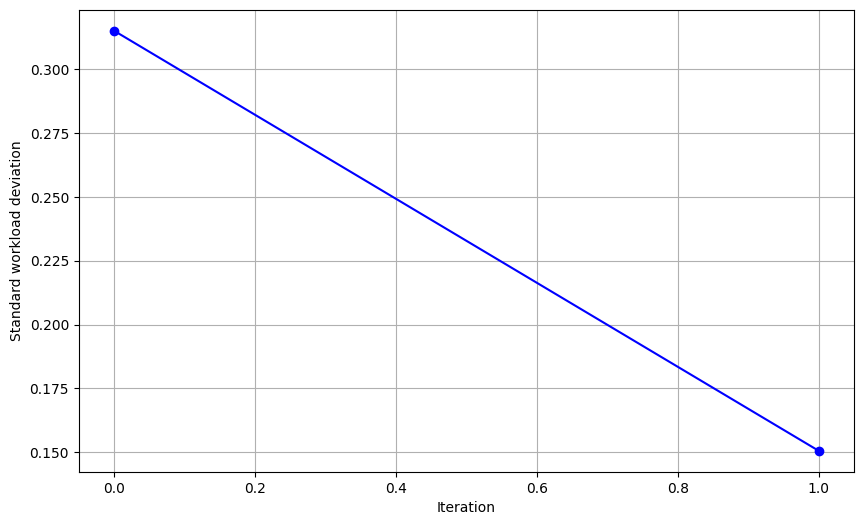

In [18]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/std_trend.csv'

# Lire le fichier CSV
df_std_trend = pd.read_csv(chemin_fichier, header=None)

# Afficher les premières lignes du dataframe
print(df.head())

# Assumer que le DataFrame a une colonne représentant les valeurs de latence
iterations = df_std_trend.index
latency = df_std_trend[0]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(iterations, latency, marker='o', linestyle='-', color='b')
#plt.title('Latence en Fonction des Itérations')
plt.xlabel('Iteration')
plt.ylabel('Standard workload deviation')
plt.grid(True)
plt.show()

       0         1
0  Node1 -0.140678
1  Node0 -0.139612
2  Node2  0.280290


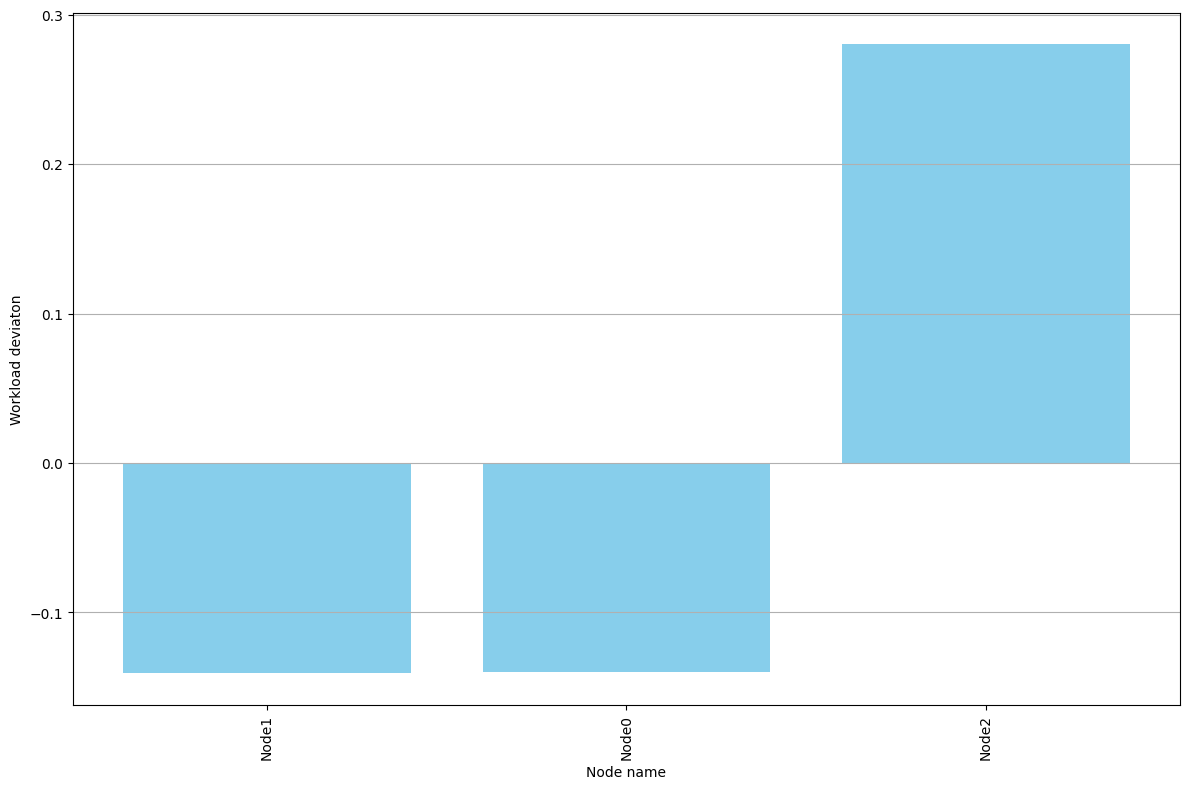

In [25]:
import pandas as pd

# Chemin vers le fichier CSV
chemin_fichier = 'Simulation/workload.csv'

# Lire le fichier CSV
df_workload = pd.read_csv(chemin_fichier, header=None, sep=';')

# Afficher les premières lignes du dataframe
print(df_workload.head())

# Assumer que les colonnes sont 'node_name' et 'workload'
node_names = df_workload[0]
workloads = df_workload[1]

# Tracer le diagramme en bâtons
plt.figure(figsize=(12, 8))
plt.bar(node_names, workloads, color='skyblue')
#plt.title('Workload deviation')
plt.xlabel('Node name')
plt.ylabel('Workload deviaton')
plt.xticks(rotation=90)  # Rotation des noms de nœuds pour une meilleure lisibilité
plt.grid(axis='y')
plt.tight_layout()  # Ajuste les marges pour éviter le découpage des labels
plt.show()